In [ ]:
####################################################################################################################
#                                    Random Forests applied on the "Koblenz Dataset"                               #
#          (https://nbviewer.jupyter.org/github/isc-konstanz/household_data/blob/2020-04-15/main.ipynb)            #
#                                                                                                                  #
#                                                                                                                  #
#                                              Following this example:                                             #
#                         https://towardsdatascience.com/random-forest-in-python-24d0893d51c0                      #
#                                                                                                                  #
#                                                                                                                  #
#                                  Ronald Siebes, VU Amsterdam, May 1th, 2021                                      #
#                                         http://interconnect-project.eu                                           #
####################################################################################################################


#      NOTE: IT TAKES QUITE SOME TIME TO TRAIN AND RENDER THE RESULTS, PLEASE BE NICE TO THE SERVER :-)            *

In [2]:
# Import the libraries to load, manipulate and visualize data 

# Pandas is used for data manipulation
import pandas as pd# Read in data and display first 5 rows
features = pd.read_csv('pump1-hourly.csv') #choose one
features.head(5)

,year,month,day,Time,EC/Hour,avgTemp/Hour,Weekday
0,2015,5,21,18:00,5.00,10,Thursday
1,2015,5,21,19:00,3.49,10,Thursday
2,2015,5,21,20:00,5.90,9,Thursday
3,2015,5,21,21:00,6.84,9,Thursday
4,2015,5,21,22:00,5.08,8,Thursday


In [3]:
print('The shape of our features is:', features.shape)
features.describe()

The shape of our features is: (21533, 7)


,year,month,day,EC/Hour,avgTemp/Hour
count,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000
mean,2016.092091,6.771374,15.827195,6.097855,9.511448
std,0.763947,3.231296,8.858838,6.428519,7.397734
min,2015.000000,1.000000,1.000000,0.000000,-12.000000
25%,2016.000000,4.000000,8.000000,0.220000,4.000000
50%,2016.000000,7.000000,16.000000,4.020000,9.000000
75%,2017.000000,9.000000,24.000000,8.300000,15.000000
max,2017.000000,12.000000,31.000000,72.640000,30.000000


In [4]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,Time_0:00,Time_10:00,Time_11:00,Time_12:00,Time_13:00,Time_14:00,Time_15:00,Time_16:00,Time_17:00,Time_18:00,...,Time_7:00,Time_8:00,Time_9:00,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
features.head(5)
features

,year,month,day,EC/Hour,avgTemp/Hour,Time_0:00,Time_10:00,Time_11:00,Time_12:00,Time_13:00,...,Time_7:00,Time_8:00,Time_9:00,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,2015,5,21,5.00,10,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2015,5,21,3.49,10,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2015,5,21,5.90,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2015,5,21,6.84,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2015,5,21,5.08,8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21528,2017,11,3,2.70,14,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21529,2017,11,3,2.70,13,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21530,2017,11,3,2.90,12,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21531,2017,11,3,2.80,11,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
# Use numpy to convert to arrays
import numpy as np# Labels are the values we want to predict
labels = np.array(features['EC/Hour'])# Remove the labels from the features


# axis 1 refers to the columns
features= features.drop('EC/Hour', axis = 1)# Saving feature names for later use
feature_list = list(features.columns)# Convert to numpy array
features = np.array(features)



# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [7]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16149, 35)
Training Labels Shape: (16149,)
Testing Features Shape: (5384, 35)
Testing Labels Shape: (5384,)


In [8]:
#----we skip this for now from the Rando-forests-example.ipynb  example -----
# TODO: fix this [Ronald]
## The baseline predictions are the historical averages
#baseline_preds = test_features[:, feature_list.index('average')]# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [13]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100)# Train the model on training data
rf.fit(train_features, train_labels);

In [14]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'KW/h.')

Mean Absolute Error: 2.1 KW/h.


In [15]:
# TODO: fix this [Ronald]
#Calculate mean absolute percentage error (MAPE)
#mape = 100 * (errors / test_labels)# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')

In [16]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
graph.write_png('tree.png')

#   NOTE, there is a HUGE graph below, its not a smudge on the screen #

<img src='tree.png'> </img>

In [17]:
# Limit depth of tree to 4 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 4)
rf_small.fit(train_features, train_labels)# Extract the small tree
tree_small = rf_small.estimators_[5]# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

<img src='small_tree.png'></img>

# Get numerical feature importances
importances = list(rf.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

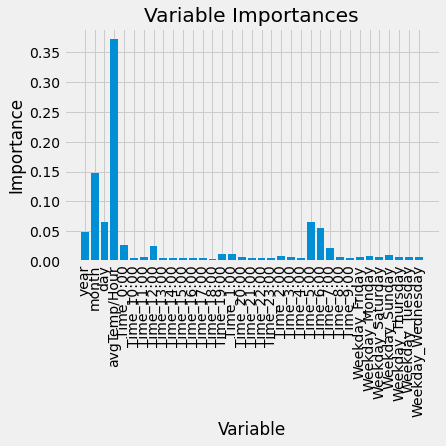

In [19]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')# list of x locations for plotting
x_values = list(range(len(importances)))# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

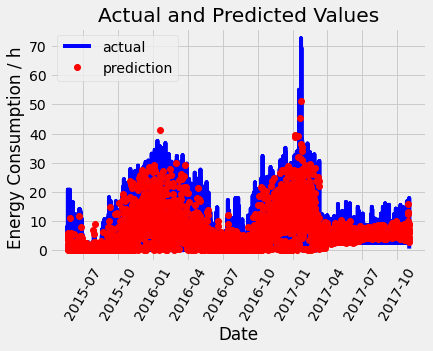

In [20]:
# Use datetime for creating date objects for plotting
import datetime# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'EC/Hour': labels})# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})# Plot the actual values
plt.plot(true_data['date'], true_data['EC/Hour'], 'b-', label = 'actual')# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Energy Consumption / h '); plt.title('Actual and Predicted Values');